In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## 기본 데이터 구성 확인

- 데이터 테이블 상태 확인

In [20]:
df = pd.read_csv("C:/Users/user/Desktop/Game Data analysis/project_groupB_data_240229.csv")
df.head(5)

,user_id,first_name,last_name,email,gender,ip_address,country,pay_store,pay_amount,information_agree,first_login_date,pay_user_type,level,action_user_type,playtime,battle_pass_level
0,f78a783a-7363-49a0-98cb-255c8603685c,Carmella,Redman,credmandk@ask.com,F,195.234.13.149,China,Other,999808,True,22-Apr,heavy user,87,pvp,8764.84,18.0
1,51bf8332-27de-43ca-8854-919fb4cb6f28,Torrence,Bayston,tbaystond4@geocities.jp,F,236.107.116.229,Indonesia,Other,998907,True,24-Feb,heavy user,13,raid,1597.69,17.0
2,547349b8-cdf4-474f-ab9d-da0f20a0185e,Trumaine,Bunney,tbunneyer@vimeo.com,F,244.13.183.124,China,AOS,998411,False,22-Apr,heavy user,35,pve,4055.51,20.0
3,c38e1601-b5ab-4025-afea-b0d089dfc991,Cornie,Brunskill,cbrunskillpe@weibo.com,M,50.129.58.233,Russia,Other,997912,False,22-Aug,heavy user,62,pve,6993.60,5.0
4,93eb5bad-3934-401c-87c3-878c269db48a,Jania,Redmile,jredmile3q@washington.edu,M,103.240.89.137,Russia,Other,997541,True,22-Jun,heavy user,89,pvp,8813.50,12.0


- 데이터 타입, 컬럼 및 결측치 확인<br> <br>
   : 배틀 패스 결측치 대치 필요<br>
   : first_login_date 날짜 형식으로 전환 전처리 필요<br>
   : playtime 컬럼 연산을 위해서 실수 형식으로 전환 필요

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            1000 non-null   object 
 1   first_name         1000 non-null   object 
 2   last_name          1000 non-null   object 
 3   email              1000 non-null   object 
 4   gender             1000 non-null   object 
 5   ip_address         1000 non-null   object 
 6   country            1000 non-null   object 
 7   pay_store          1000 non-null   object 
 8   pay_amount         1000 non-null   int64  
 9   information_agree  1000 non-null   bool   
 10  first_login_date   1000 non-null   object 
 11  pay_user_type      1000 non-null   object 
 12  level              1000 non-null   int64  
 13  action_user_type   1000 non-null   object 
 14  playtime           1000 non-null   float64
 15  battle_pass_level  849 non-null    float64
dtypes: bool(1), float64(2), i

- 기초 전처리 진행

In [22]:
df['first_login_date'] = pd.to_datetime(df['first_login_date'], format='%d-%b')
df.head()

,user_id,first_name,last_name,email,gender,ip_address,country,pay_store,pay_amount,information_agree,first_login_date,pay_user_type,level,action_user_type,playtime,battle_pass_level
0,f78a783a-7363-49a0-98cb-255c8603685c,Carmella,Redman,credmandk@ask.com,F,195.234.13.149,China,Other,999808,True,1900-04-22,heavy user,87,pvp,8764.84,18.0
1,51bf8332-27de-43ca-8854-919fb4cb6f28,Torrence,Bayston,tbaystond4@geocities.jp,F,236.107.116.229,Indonesia,Other,998907,True,1900-02-24,heavy user,13,raid,1597.69,17.0
2,547349b8-cdf4-474f-ab9d-da0f20a0185e,Trumaine,Bunney,tbunneyer@vimeo.com,F,244.13.183.124,China,AOS,998411,False,1900-04-22,heavy user,35,pve,4055.51,20.0
3,c38e1601-b5ab-4025-afea-b0d089dfc991,Cornie,Brunskill,cbrunskillpe@weibo.com,M,50.129.58.233,Russia,Other,997912,False,1900-08-22,heavy user,62,pve,6993.60,5.0
4,93eb5bad-3934-401c-87c3-878c269db48a,Jania,Redmile,jredmile3q@washington.edu,M,103.240.89.137,Russia,Other,997541,True,1900-06-22,heavy user,89,pvp,8813.50,12.0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            1000 non-null   object        
 1   first_name         1000 non-null   object        
 2   last_name          1000 non-null   object        
 3   email              1000 non-null   object        
 4   gender             1000 non-null   object        
 5   ip_address         1000 non-null   object        
 6   country            1000 non-null   object        
 7   pay_store          1000 non-null   object        
 8   pay_amount         1000 non-null   int64         
 9   information_agree  1000 non-null   bool          
 10  first_login_date   1000 non-null   datetime64[ns]
 11  pay_user_type      1000 non-null   object        
 12  level              1000 non-null   int64         
 13  action_user_type   1000 non-null   object        
 14  playtime 

- 최초, 마지막 날짜 확인 : 1월 20일부터 12월 23일까지의 데이터

In [24]:
print(df['first_login_date'].min())
print(df['first_login_date'].max())

1900-01-20 00:00:00
1900-12-23 00:00:00


- 컬럼별 각종 통계량 확인

In [25]:
df.describe(include='all')

,user_id,first_name,last_name,email,gender,ip_address,country,pay_store,pay_amount,information_agree,first_login_date,pay_user_type,level,action_user_type,playtime,battle_pass_level
count,1000,1000,1000,1000,1000,1000,1000,1000,1000.000000,1000,1000,1000,1000.000000,1000,1000.000000,849.000000
unique,1000,933,991,1000,2,1000,121,3,NaN,2,NaN,3,NaN,4,NaN,NaN
top,f78a783a-7363-49a0-98cb-255c8603685c,Webb,Swinfen,credmandk@ask.com,F,195.234.13.149,China,Other,NaN,False,NaN,heavy user,NaN,pvp,NaN,NaN
freq,1,3,2,1,512,1,191,699,NaN,510,NaN,722,NaN,276,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,506928.942000,NaN,1900-06-30 17:55:40.800000,NaN,50.067000,NaN,5297.321360,10.577150
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2506.000000,NaN,1900-01-20 00:00:00,NaN,1.000000,NaN,11.040000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,264367.500000,NaN,1900-03-22 00:00:00,NaN,25.750000,NaN,2981.510000,6.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,516729.000000,NaN,1900-06-22 00:00:00,NaN,49.000000,NaN,5377.085000,11.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,732825.000000,NaN,1900-09-23 00:00:00,NaN,75.000000,NaN,7683.482500,15.000000
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,999808.000000,NaN,1900-12-23 00:00:00,NaN,100.000000,NaN,9996.170000,20.000000


## 상관 관계 파악
- 유저 타입과의 상관 관계<br>
  : 헤비유저의 경우 대부분의 지표에서 눈에 띄게 높은 지표를 확인할 수 있음(pay_amount, battle_path_level 등)

- 성별과의 상관 관계<br>
  : 성별의 따른 지표 차이는 그다지 없음, 그러나 가장 많은 수준의 과금을 한 유저들 중에 여성 비중이 많음

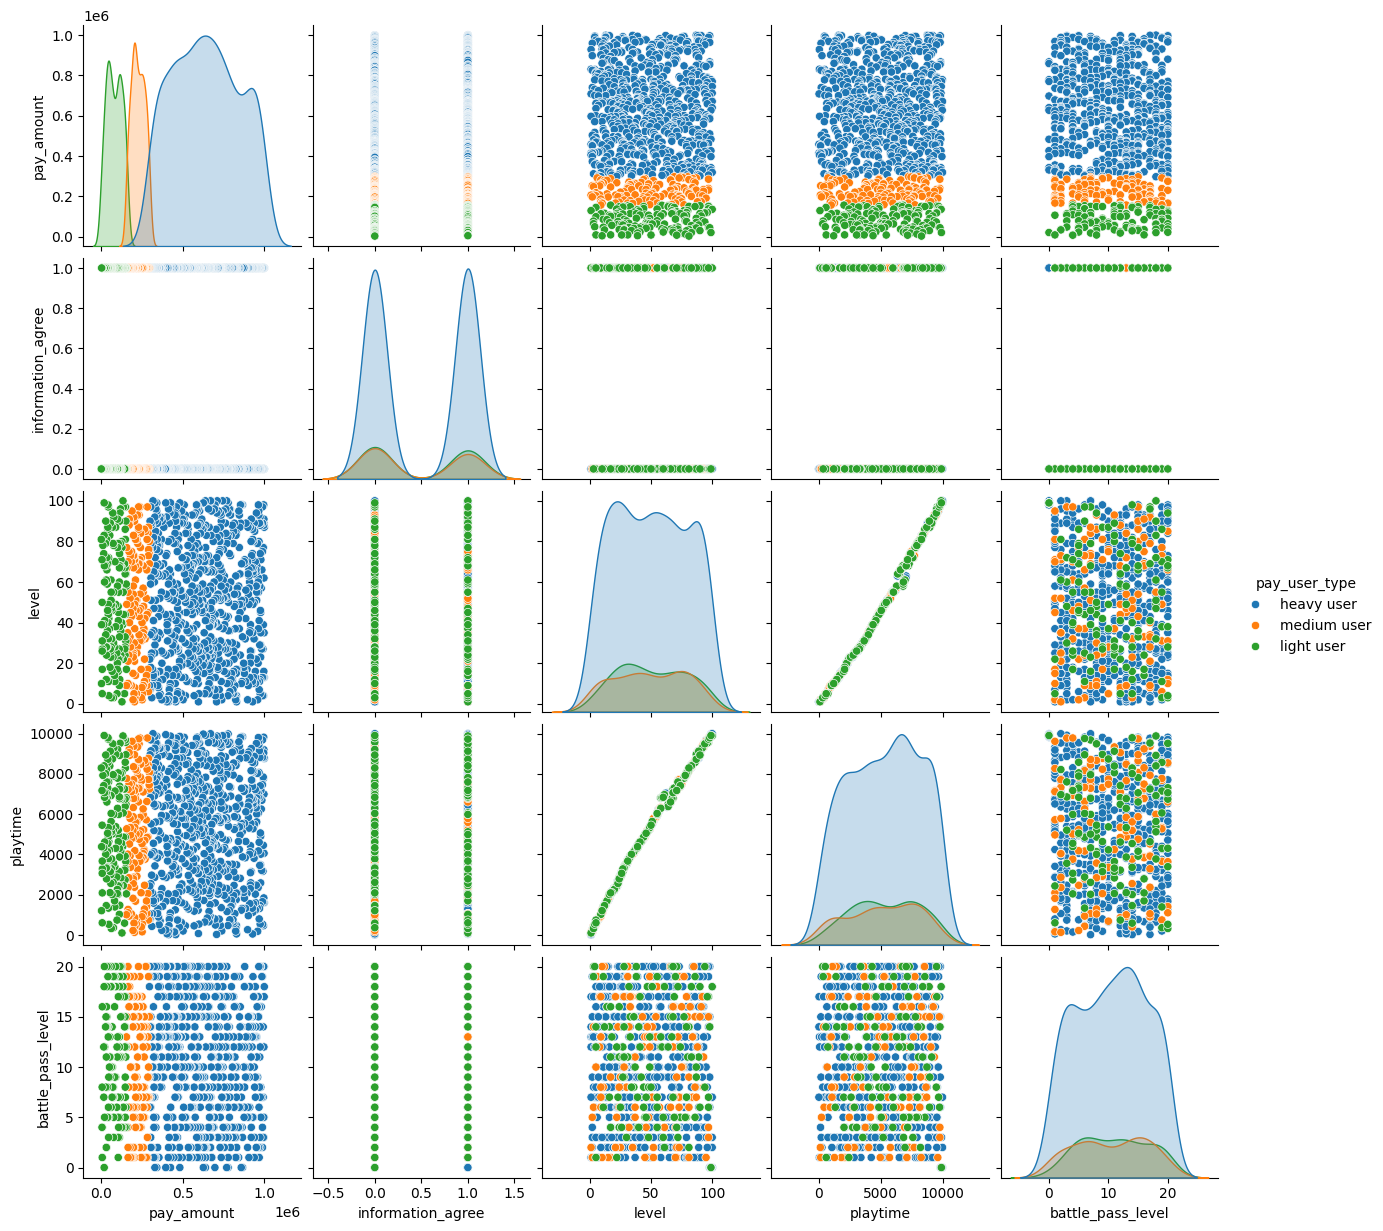

In [29]:
# 상관 관계 분석 (색 표현 = 유저 타입 : heavy, medium, light)
sns.pairplot(df, hue='pay_user_type')

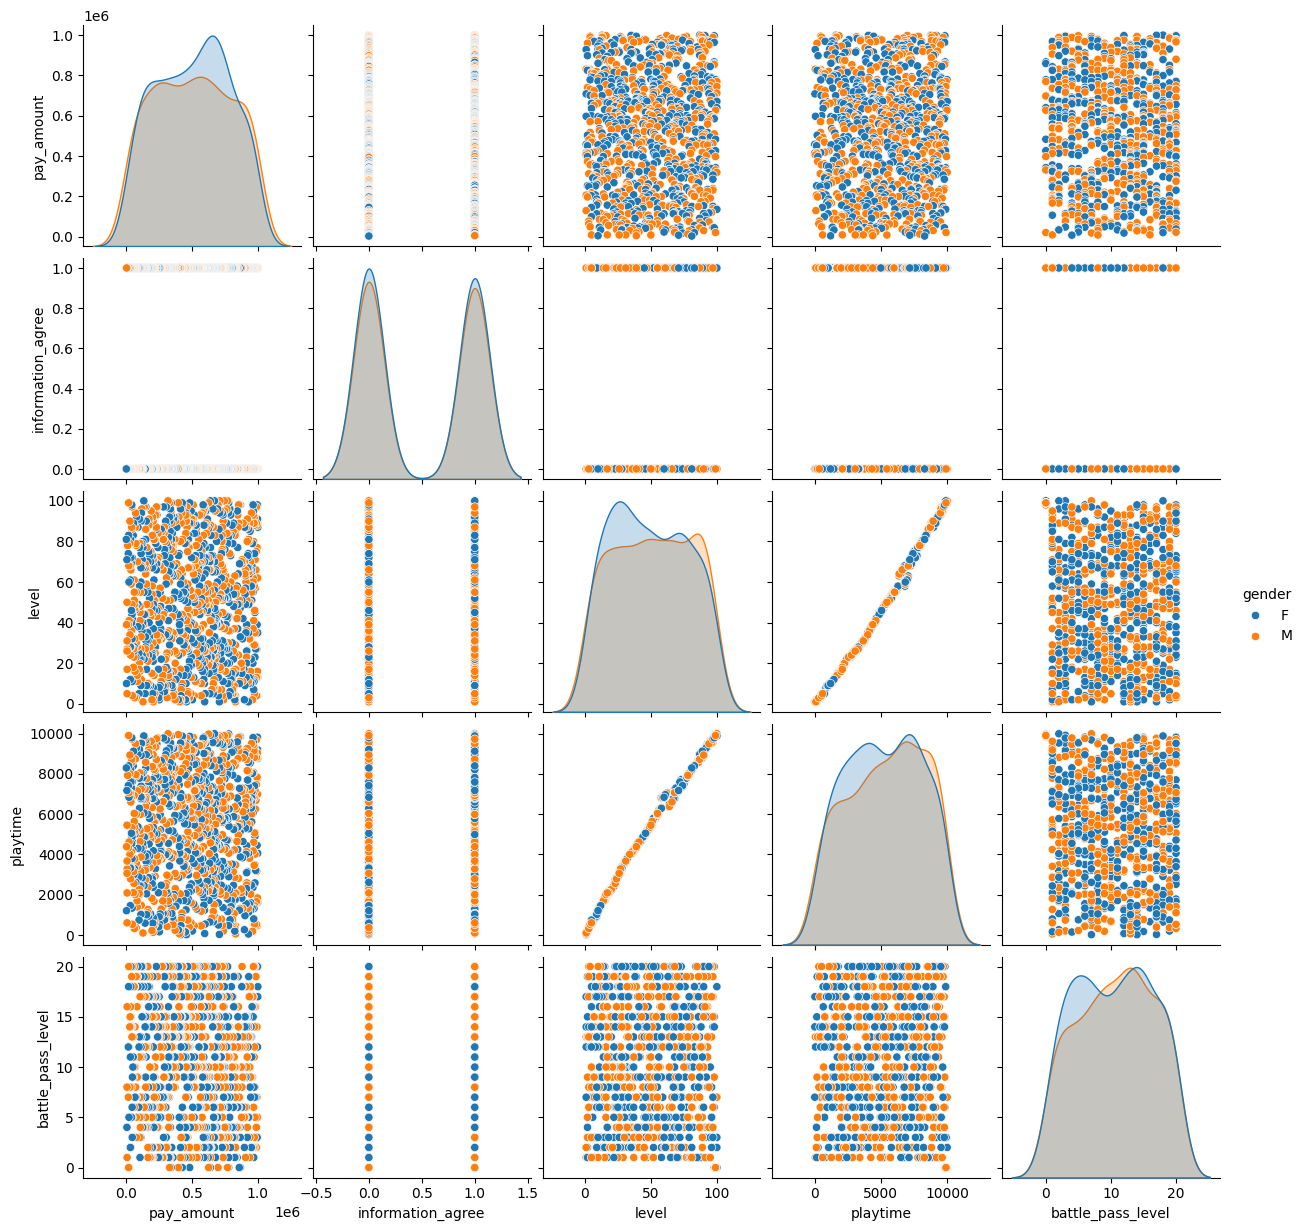

In [27]:
# 상관 관계 분석 (색 표현 = 성별 : F,M)
sns.pairplot(df, hue='gender')

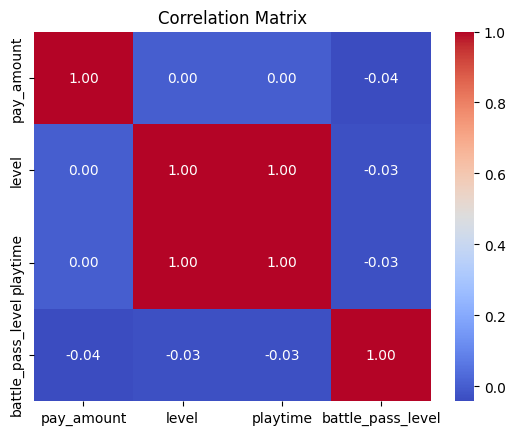

In [28]:
# 숫자형 컬럼만 선택
numeric_columns = df.select_dtypes(include=['number'])

# 상관 관계 행렬 계산 및 시각화
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()  